In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Online_Retail_targeted.csv')
data.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,47,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748,United Kingdom
1,66,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100,United Kingdom
2,169,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/1/2010 9:56,19.95,17420,United Kingdom
3,170,536385,22961,JAM MAKING SET PRINTED,12,12/1/2010 9:56,1.45,17420,United Kingdom
4,171,536385,22960,JAM MAKING SET WITH JARS,6,12/1/2010 9:56,4.25,17420,United Kingdom


In [3]:
data=data.drop('Unnamed: 0',axis=1)

In [4]:
df=data.copy()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [6]:
# unique values in each column
for i in df.columns:
    print(i,':',df[i].nunique())

InvoiceNo : 5588
StockCode : 3365
Description : 3499
Quantity : 164
InvoiceDate : 5463
UnitPrice : 180
CustomerID : 1974
Country : 1


In [7]:
plt.figure(figsize=(14,16))
Item_distr.sort_values('Frequency',inplace=True)
Item_distr.plot(kind='barh',y='Frequency',x='Description',color='r')


NameError: name 'Item_distr' is not defined

<Figure size 1008x1152 with 0 Axes>

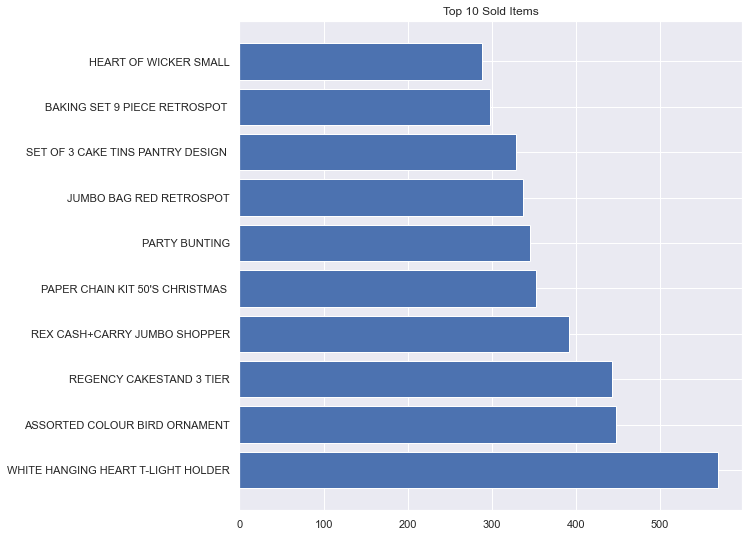

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Item_distr = df.groupby(by = "Description").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(9,9)

# Create horizontal bars
ax.barh(y=Item_distr.Description, width=Item_distr.Frequency);

# Add title
ax.set_title('Top 10 Sold Items');


                             Description  Frequency
3337  WHITE HANGING HEART T-LIGHT HOLDER        569
194        ASSORTED COLOUR BIRD ORNAMENT        448
2472            REGENCY CAKESTAND 3 TIER        443
2519        REX CASH+CARRY JUMBO SHOPPER        392
2077     PAPER CHAIN KIT 50'S CHRISTMAS         353
2109                       PARTY BUNTING        346
1569             JUMBO BAG RED RETROSPOT        337
2690   SET OF 3 CAKE TINS PANTRY DESIGN         329
242        BAKING SET 9 PIECE RETROSPOT         298
1427               HEART OF WICKER SMALL        288


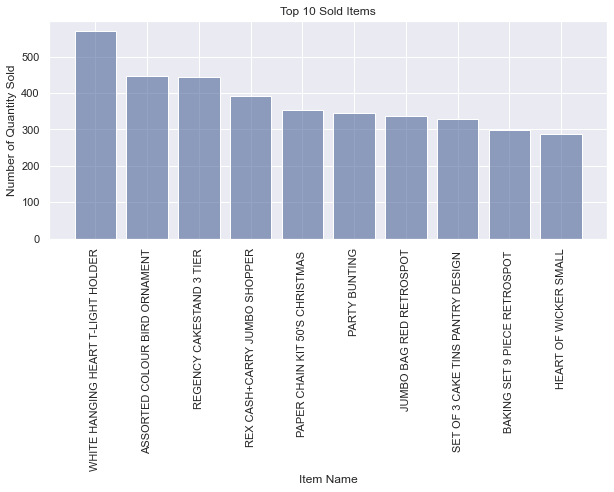

In [9]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "Description").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["Description"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(10,4))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation=90)

# Show graph
print(Item_distr)
plt.show()

In [10]:
AmoutSum = df.groupby(["Description"]).Total_Amount.sum().sort_values(ascending = False)
inv = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)


fig = plt.figure(figsize=(20, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

#f1 = fig.add_subplot(122)

AttributeError: 'DataFrameGroupBy' object has no attribute 'Total_Amount'

In [11]:
Top10Ev = list(inv[:10].index)
PercentSales =  np.round((AmoutSum[Top10Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top10Ev].\
    plot(kind='bar', title='Events of top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))
fig = plt.figure(figsize=(25, 25))

NameError: name 'inv' is not defined

In [12]:
AmoutSum = df.groupby(["Description"]).Total_Amount.sum().sort_values(ascending = False)
inv = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)


fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

f1 = fig.add_subplot(122)
Top10Ev = list(inv[:10].index)
PercentSales =  np.round((AmoutSum[Top10Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top10Ev].\
    plot(kind='bar', title='Events of top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))
fig = plt.figure(figsize=(25, 7))
Top15ev = list(inv[:15].index)
PercentSales =  np.round((AmoutSum[Top15ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top15ev].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top15ev].sort_values(ascending = False).\
    plot(kind='bar', 
         title='Sales Amount of top 15 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top50 = list(AmoutSum[:50].index)
PercentSales =  np.round((AmoutSum[Top50].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top50].\
    plot(kind='bar', 
         title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top50Ev = list(inv[:50].index)
PercentSales =  np.round((AmoutSum[Top50Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top50Ev].\
    plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

AttributeError: 'DataFrameGroupBy' object has no attribute 'Total_Amount'

In [13]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
unique_desc = df[["StockCode", "Description"]].groupby(by=["StockCode"]).\
                apply(pd.DataFrame.mode).reset_index(drop=True)
unique_desc
q = '''
select df.InvoiceNo, df.StockCode, un.Description, df.Quantity, df.InvoiceDate,
       df.UnitPrice, df.CustomerID, df.Country
from df as df INNER JOIN 
     unique_desc as un on df.StockCode = un.StockCode
'''

df = pysqldf(q)
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['Total_Amount'] = df.Quantity*df.UnitPrice
df.CustomerID = df.CustomerID.astype('Int64')
df.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
1,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,350.40
2,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,2010-12-01 09:56:00,19.95,17420,United Kingdom,19.95
3,536385,22961,JAM MAKING SET PRINTED,12,2010-12-01 09:56:00,1.45,17420,United Kingdom,17.40
4,536385,22960,JAM MAKING SET WITH JARS,6,2010-12-01 09:56:00,4.25,17420,United Kingdom,25.50
5,536385,22663,JUMBO BAG DOLLY GIRL DESIGN,10,2010-12-01 09:56:00,1.95,17420,United Kingdom,19.50


In [14]:
# bit of cleaning 
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')] # removing transactions with the credit 

In [15]:
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [16]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [17]:
#Generate the frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.017, use_colnames=True).sort_values("support",ascending=False)
print(frequent_itemsets.head(10))
print(frequent_itemsets.shape)

/Users/sunil/miniforge3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                              itemsets
272  0.111591  (WHITE HANGING HEART T-LIGHT HOLDER)
24   0.087752       (ASSORTED COLOUR BIRD ORNAMENT)
200  0.084464            (REGENCY CAKESTAND 3 TIER)
167  0.069462      (PAPER CHAIN KIT 50'S CHRISTMAS)
206  0.069256        (REX CASH+CARRY JUMBO SHOPPER)
171  0.068845                       (PARTY BUNTING)
121  0.067201             (JUMBO BAG RED RETROSPOT)
226  0.063296    (SET OF 3 CAKE TINS PANTRY DESIGN)
27   0.058364        (BAKING SET 9 PIECE RETROSPOT)
99   0.057337               (HEART OF WICKER SMALL)
(325, 2)


In [23]:
#Apply association rules
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("confidence",ascending=False).reset_index(drop=True)
assoc_rules.shape

(68, 9)

In [24]:
assoc_rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.021578,0.033909,0.019729,0.914286,26.963117,0.018997,11.271065
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.027744,0.033909,0.024455,0.881481,25.995690,0.023515,8.151395
2,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.024455,0.037402,0.019729,0.806723,21.568751,0.018814,4.980396
3,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.027744,0.037402,0.021578,0.777778,20.794872,0.020541,4.331689
4,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.025483,0.027744,0.019729,0.774194,27.905376,0.019022,4.305707
5,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT),0.027127,0.058364,0.020962,0.772727,13.239757,0.019379,4.143198
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.033909,0.037402,0.025483,0.751515,20.092707,0.024215,3.873868
7,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.031032,0.032881,0.022606,0.728477,22.154801,0.021585,3.561828
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.033909,0.027744,0.024455,0.721212,25.995690,0.023515,3.487442
9,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.038635,0.048705,0.027538,0.712766,14.634258,0.025656,3.311915
